# Generating Synthetic data for 100 trials

This file goes over the process of generating a synthetic trial, your job is to replicate this process 100 times and store the results in json format on a text file for later processing.  Read the comments to get an idea about the missing code.



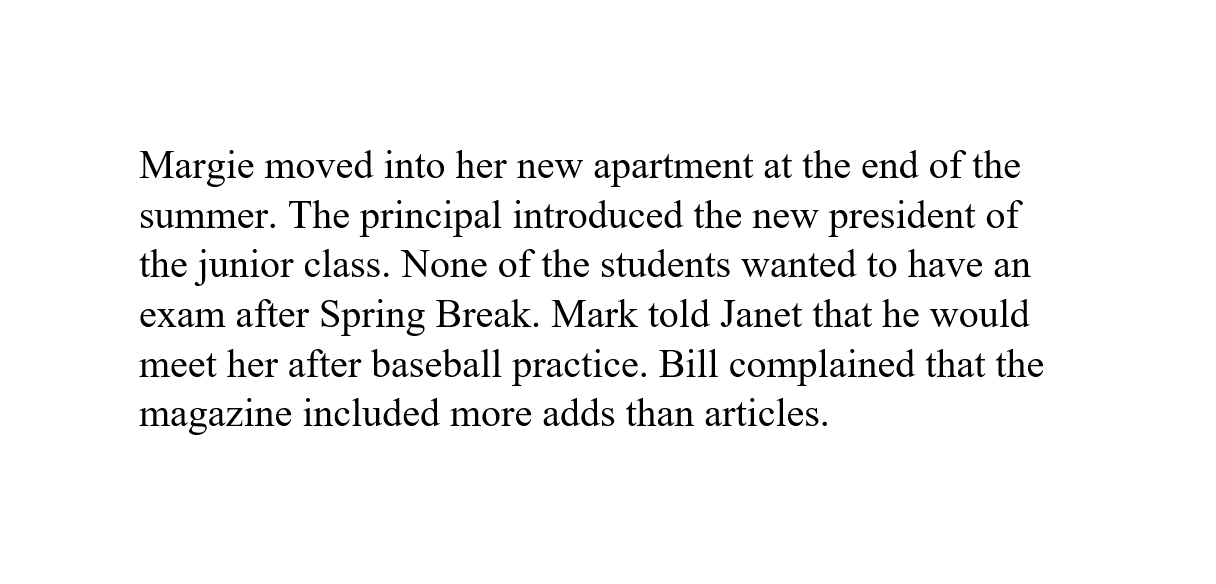

In [2]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='synthetic_text.png')
img

In [3]:
# yup, this is the same library we used last semester.  We call that foreshadowing :)

import emip_toolkit as EMTK

In [4]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

/Users/feng_0/Desktop/cs421/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/feng_0/Desktop/cs421/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/feng_0/Desktop/cs421/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/feng_0/Desktop/cs421/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/feng_0/Desktop/cs421/CS421-pr

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png


In [5]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

/Users/feng_0/Desktop/cs421/CS421-project1/emip_toolkit.py:1367: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location in aois_raw["name"].iteritems():


,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png,new


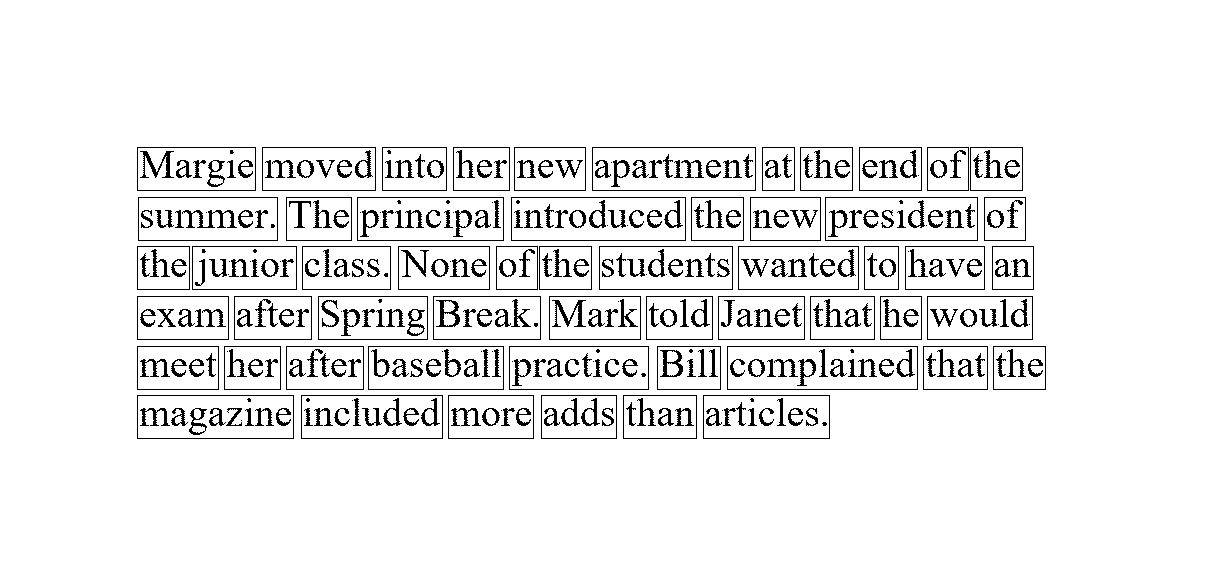

In [6]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

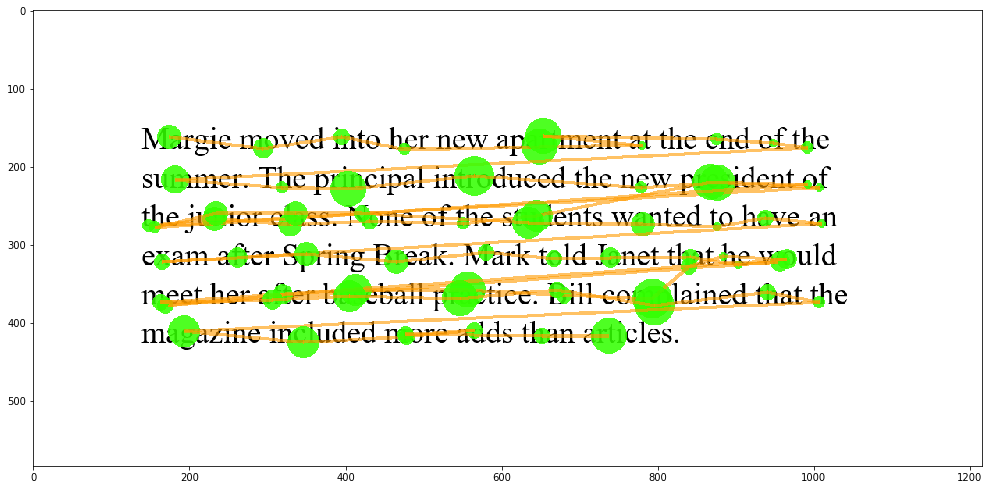

In [7]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)

# drawing the synthetic data!
correction.draw_fixation('synthetic_text.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

Look at that, we did something cool!  Now that we know how to generate a single snythetic trial, let's generate 100 and store them in a text file called "synthetic_dataset_with_time.txt" in json format.  I will guide you through the steps using the comments!

In [9]:
data = {}

# loop 100 times maintaining a variable called index
for index in range(100):

    # generate a synthetic trial using similar code to the one above
    synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)
    
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    key_name = "robot" + str(index)
    data[key_name] = synth_fixations
    


In [10]:
# check that the data looks correct

data["robot1"]

[[187.16666666666666, 179.0, 300],
 [306.5, 163.0, 250],
 [412.1666666666667, 163.0, 200],
 [468.5, 167.0, 150],
 [536.5, 160.0, 150],
 [638.1666666666666, 159.0, 450],
 [775.5, 163.0, 100],
 [878.5, 177.0, 150],
 [984.1666666666666, 167.0, 150],
 [185.16666666666666, 218.0, 350],
 [300.5, 216.0, 150],
 [414.5, 209.0, 450],
 [563.8333333333334, 228.0, 500],
 [657.1666666666666, 164.0, 450],
 [773.5, 167.0, 100],
 [872.5, 159.0, 150],
 [191.16666666666666, 215.0, 350],
 [411.5, 222.0, 450],
 [577.8333333333334, 212.0, 500],
 [713.1666666666666, 211.0, 150],
 [880.5, 226.0, 450],
 [996.5, 219.0, 100],
 [147.16666666666666, 269.0, 150],
 [229.5, 270.0, 300],
 [341.1666666666667, 273.0, 300],
 [430.1666666666667, 261.0, 200],
 [553.1666666666666, 273.0, 150],
 [652.1666666666666, 271.0, 400],
 [784.8333333333334, 276.0, 300],
 [938.1666666666666, 269.0, 200],
 [1016.5, 268.0, 100],
 [171.16666666666666, 309.0, 200],
 [264.5, 317.0, 250],
 [363.1666666666667, 314.0, 300],
 [469.5, 322.0, 30

In [18]:

# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"
import json

# Serializing json
json_object = json.dumps(data)
 
# Writing to txt
with open("synthetic_dataset_with_time.txt", "w") as outfile:
    outfile.write(json_object)

That should be it, don't overthink it!  You did great by the way, I can see you, its one of my supernatural abilities.